<a href="https://colab.research.google.com/github/khldsqmr/Medical-Insurance-Data-Analysis/blob/main/Medical_Insurance_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Insurance Data Analysis**

In [ ]:
# Libraries
import copy
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Import Dataset
df = pd.read_csv("insurance.csv")

# Dataset view
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Exploratory Analysis:**

*   Shape of the data, data type etc
*   Check for missing values
*   Descriptive statistics
*   Distribution of numerical columns, skeweness and outliers
*   Distribution of categorical columns




In [ ]:
# Basic Info

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max

In [ ]:
# Check for Missing Values

df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

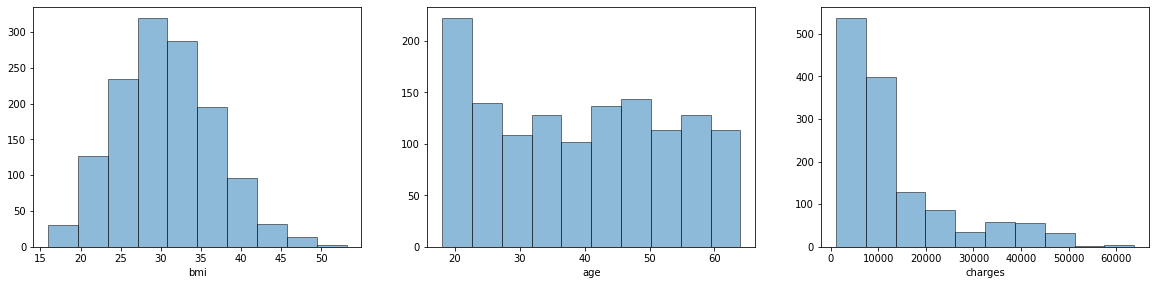

Skewness of bmi:  0.28
Skewness of age:  0.06
Skewness of charges:  1.51


In [ ]:
# Histogram of Continuous Variables

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df.bmi, edgecolor = 'black', alpha = 0.5)
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(df.age, edgecolor = 'black', alpha = 0.5)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(df.charges, edgecolor = 'black', alpha = 0.5)
plt.xlabel('charges')

plt.show()

bmi_skewness = stats.skew(df.bmi)
age_skewness = stats.skew(df.age)
charges_skewness = stats.skew(df.charges)

print('Skewness of bmi: ', round(bmi_skewness,2))
print('Skewness of age: ', round(age_skewness,2))
print('Skewness of charges: ', round(charges_skewness,2))

**Inference:**

*   Variable **bmi** is normally distributed
*   Variable **age** is slightly uniformly distributed
*   Variable **charges** is rightly skewed

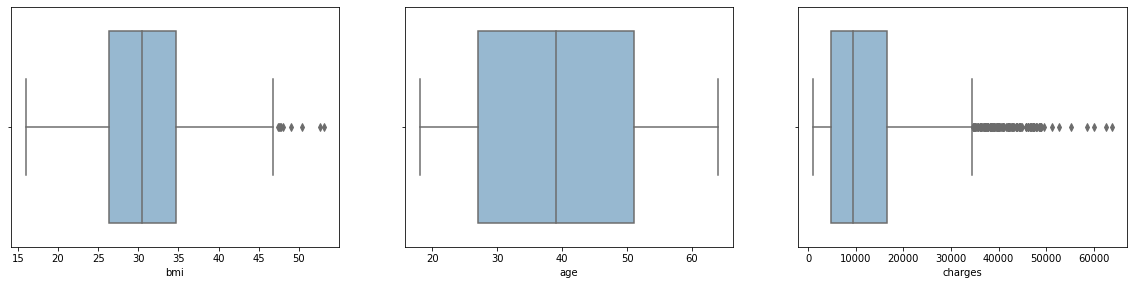

In [ ]:
# Check for Outliers

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(x= df.bmi, color = '#8EBAD9')

plt.subplot(3,3,2)
sns.boxplot(x= df.age, color = '#8EBAD9')

plt.subplot(3,3,3)
sns.boxplot(x= df.charges, color = '#8EBAD9')

plt.show()

**Inference:**

*   Variable **bmi** has outliers towards higher values
*   Variable **age** does not have outliers
*   Variable **charges** has outliers towards extreme higher values (rightly skewed)






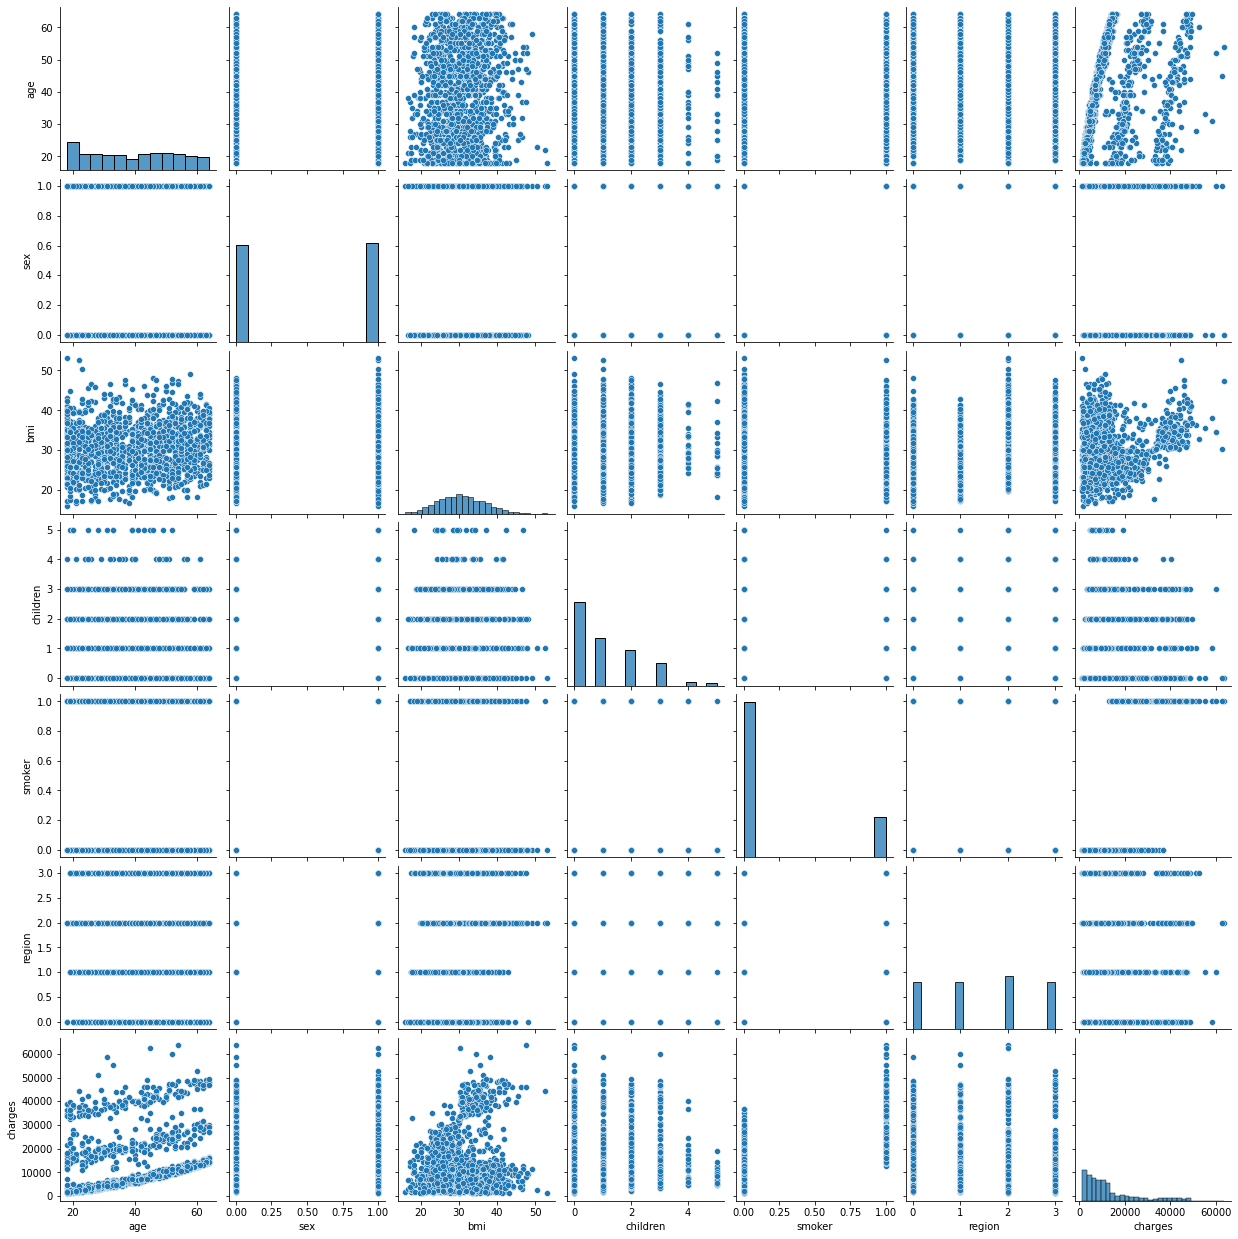

In [ ]:
#create pairs plot (categorical and numerical variables)

df_ = df.copy()
df_.loc[:,['sex', 'smoker', 'region']] = df_.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 
sns.pairplot(df_)
plt.show()

In [ ]:
print("Variable smoker Value Counts: ")
print(df.smoker.value_counts())
print("---")
print("Variable sex Value Counts: ")
print(df.sex.value_counts())
print("---")
print("Variable region Value Counts: ")
print(df.region.value_counts())
print("---")
print("Variable children Value Counts: ")
print(df.children.value_counts())

Variable smoker Value Counts: 
no     1064
yes     274
Name: smoker, dtype: int64
---
Variable sex Value Counts: 
male      676
female    662
Name: sex, dtype: int64
---
Variable region Value Counts: 
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
---
Variable children Value Counts: 
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


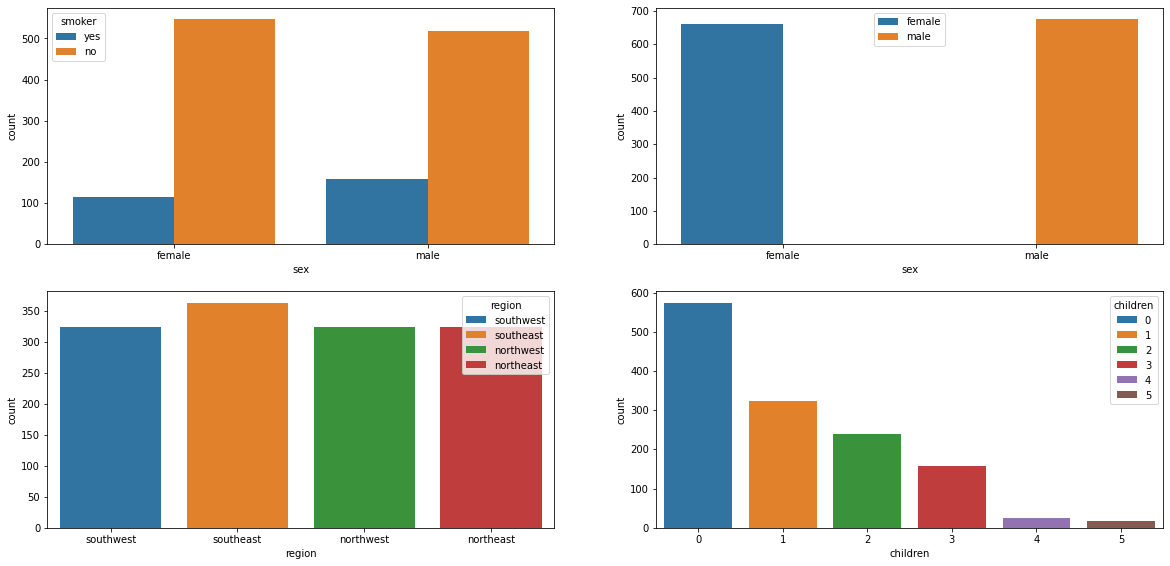

In [ ]:
# count plot along y axis

plt.figure(figsize= (20,20))

plt.subplot(4,2,1)
sns.countplot(x ='sex', hue = "smoker", data = df)

plt.subplot(4,2,2)
sns.countplot(x ='sex', hue = "sex", data = df)
plt.legend(loc='upper center')

plt.subplot(4,2,3)
sns.countplot(x ='region', hue = "region", data = df, dodge=False)

plt.subplot(4,2,4)
sns.countplot(x ='children', hue = "children", data = df, dodge=False)

plt.show()

**Inference:**

*   For both male and female, there are more non-smokers compared to the smokers
*   Male and female genders are almost equally distibuted (no class imbalance)
*   Data has evenly distributed counts across different regions
*   Majority of the records have 0 children, followed by 1,2,3, etc, further containing quite less records with 4,5 children



# **Relationship between the variables, *charges* and *smoker* with respect to *age***

### **Visual Inspection**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


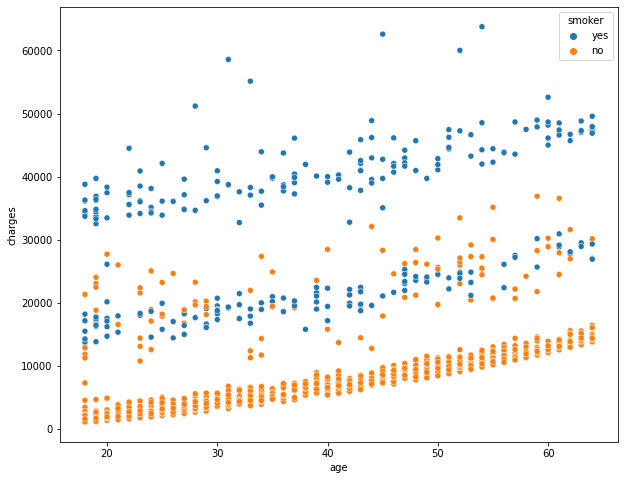

In [ ]:
# Charges vs age w.r.t smoker

plt.figure(figsize=(10,8))
sns.scatterplot(df.age, df.charges,hue=df.smoker)
plt.show()

### **Visual Inspection**

**charges and smoker with respect to bmi**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


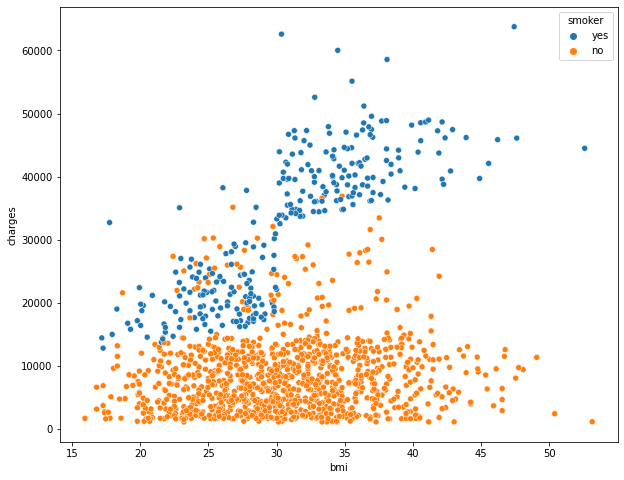

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(df.bmi, df.charges,hue=df.smoker)
plt.show()

### **Statistical Inspection:**

**T-test to check relationship of charges and smoking**

In [ ]:
# T-test to check relationship of charges and smoking
# Null Hypothesis
Ho = "Charges of smoker and non-smoker are same"  
# Alternate Hypothesis 
Ha = "Charges of smoker and non-smoker differ"   

# Independent t-test (compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different)
t, p_value  = stats.ttest_ind(np.array(df[df.smoker == 'yes'].charges) , np.array(df[df.smoker == 'no'].charges), axis = 0)  #Performing an Independent t-test

# Alpha = 0.05 (Significance level at 5%)
print('p_value: ', p_value)

p_value:  8.271435842179102e-283


**Inference:**

*   Charges of smoker and non-smoker differ as p-value is less than 0.05
*   Charges of insurance plans for smokers are higher

### **Visual Inspection**

**To check the proportion of smokers and non-smokers across different genders**

<Figure size 720x576 with 0 Axes>

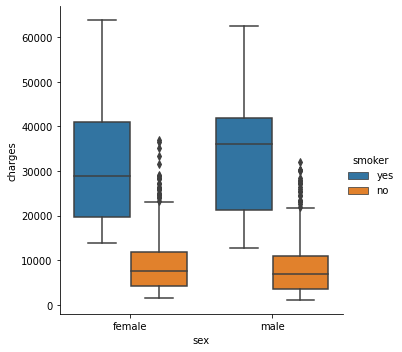

In [ ]:
plt.figure(figsize=(10,8))
sns.catplot(x="sex", y="charges", hue="smoker", kind="box", data=df)
plt.show()

In [ ]:
# Contingency table of sex and smoker attributes
Contingency_table = pd.crosstab(df['sex'],df['smoker'])
print('---')
print(Contingency_table)


---
smoker   no  yes
sex             
female  547  115
male    517  159


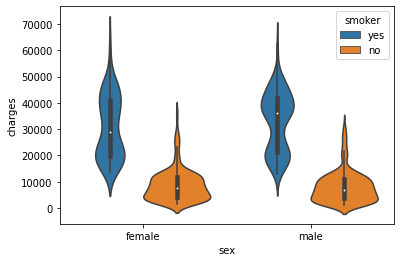

In [ ]:
sns.violinplot(x="sex", y="charges", hue="smoker", kind="swarm", data=df)
plt.show()

### **Statistical Inspection:**

**Chi_square test to check the difference of smokers/non-smokers proportion across different genders**

In [ ]:
# Chi_square test to check the difference of smokers/non-smokers proportion across different genders
# Null Hypothesis
# Ho = "Gender has no effect on smoking habits" 
# Alternate Hypothesis  
# Ha = "Gender has an effect on smoking habits"  

chi, p_value, dof, expected =  stats.chi2_contingency(Contingency_table)

# Alpha = 0.05 (Significance level at 5%)
print('p_value: ', p_value)

p_value:  0.006548143503580696


**Inference:**

*   Smoking habit is related to gender as p_value is less than 0.05
*   Based on the contingency table, there are more smokers in males (30.8%) than that in females (21%)


# **Relationship between the variables, *charges* and *sex* with respect to *bmi***

### **Visual Inspection**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


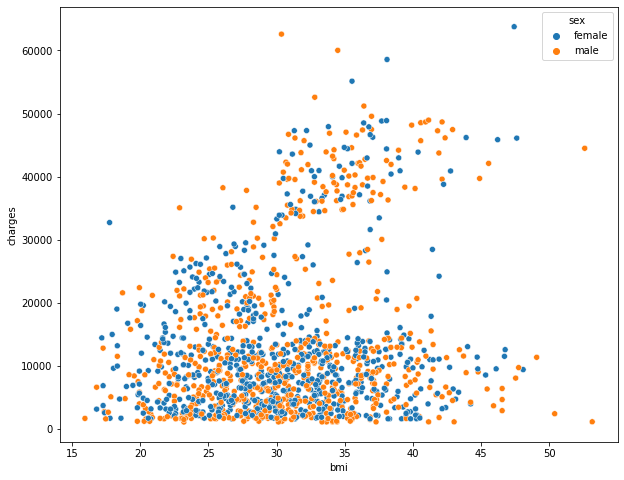

In [ ]:
# Charges vs age w.r.t smoker

plt.figure(figsize=(10,8))
sns.scatterplot(df.bmi, df.charges,hue=df.sex)
plt.show()

### **Statistical Inspection:**

**T-test to check the relationship of charges and sex**

In [ ]:
# T-test to check relationship of charges and sex
# Null Hypothesis
Ho = "Charges of male and female are same"  
# Alternate Hypothesis 
Ha = "Charges of male and female differ"   

# Independent t-test (compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different)
t, p_value  = stats.ttest_ind(np.array(df[df.sex == 'male'].charges) , np.array(df[df.sex == 'female'].charges), axis = 0)  #Performing an Independent t-test

# Alpha = 0.05 (Significance level at 5%)
print('p_value: ', p_value)

p_value:  0.03613272100592976


**Inference:**

*   Charges of male and female differ as p-value is less than 0.05
*   Charges increase with increase in bmi



### **Statistical Inspection:**

**T-test to check the relationship of bmi and sex**

In [ ]:
# T-test to check relationship of bmi and sex
# Null Hypothesis
# Ho = "bmi of male and female are same"  
# Alternate Hypothesis 
# Ha = "bmi of male and female differ"   

# Independent t-test (compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different)
t, p_value  = stats.ttest_ind(np.array(df[df.sex == 'male'].bmi) , np.array(df[df.sex == 'female'].bmi), axis = 0)  #Performing an Independent t-test

# Alpha = 0.05 (Significance level at 5%)
print('p_value: ', p_value)

p_value:  0.08997637178984932


**Inference:**

*   bmi of male and female are same as p-value is greater than 0.05



# **Relationship between the variables, *charges* and *smoker* across different *region***

### **Visual Inspection**

<Figure size 720x576 with 0 Axes>

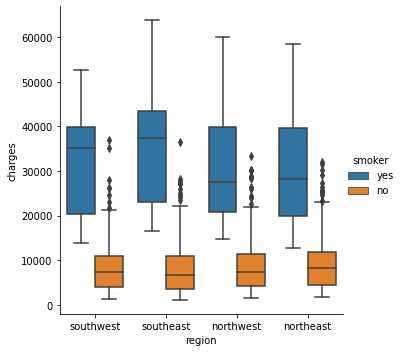

In [ ]:
plt.figure(figsize=(10,8))
sns.catplot(x="region", y="charges", hue="smoker", kind="box", data=df)
plt.show()

In [ ]:
# Contingency table
Contingency_table = pd.crosstab(df['smoker'], df['region'])
print(Contingency_table)

region  northeast  northwest  southeast  southwest
smoker                                            
no            257        267        273        267
yes            67         58         91         58


In [ ]:
# Chi_square test to check the difference in smoking habits in different regions
# Null Hypothesis
# Ho = "Smoking habit is independent of region" 
# Alternate Hypothesis  
# Ha = "Smoking habit is dependent on region"   

chi, p_value, dof, expected =  stats.chi2_contingency(Contingency_table)

print('p_value: ', p_value)

p_value:  0.06171954839170547


**Inference:**

*   Smoking habit is indepedent of the region as p_value is greater than 0.05




<Figure size 720x576 with 0 Axes>

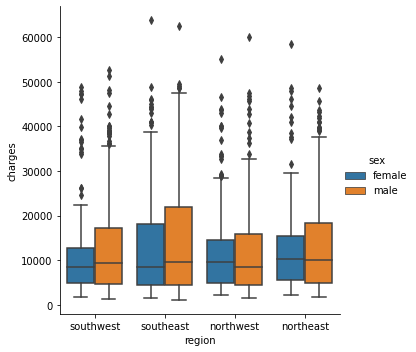

In [ ]:
plt.figure(figsize=(10,8))
sns.catplot(x="region", y="charges", hue="sex", kind="box", data=df)
plt.show()

In [ ]:
# Contingency table
Contingency_table = pd.crosstab(df['sex'], df['region'])
print(Contingency_table)

region  northeast  northwest  southeast  southwest
sex                                               
female        161        164        175        162
male          163        161        189        163


In [ ]:
# Chi_square test to check the difference in gender proportion in different regions
# Null Hypothesis
# Ho = "Gender proportion varies with region" 
# Alternate Hypothesis  
# Ha = "Gender proportion is independent of region"   

chi, p_value, dof, expected =  stats.chi2_contingency(Contingency_table)

print('p_value: ', p_value)

p_value:  0.9328921288772233


**Inference:**

*   Gender proportion is independent of region as p_value is greater than 0.05


# **Relationship of *charges* with *age*, *bmi*, and *children* based on smoking habits**

### **Visual Inspection**

<Figure size 1440x1440 with 0 Axes>

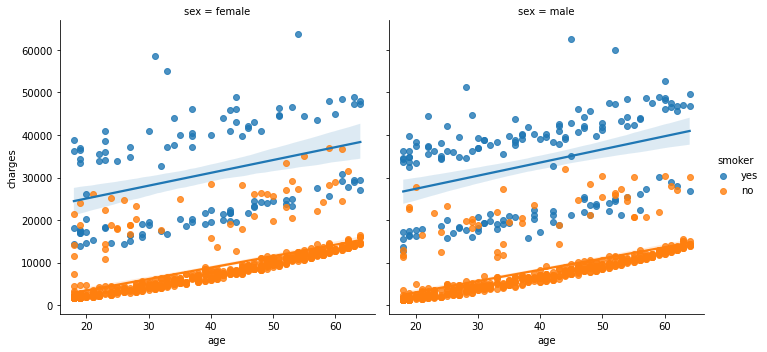

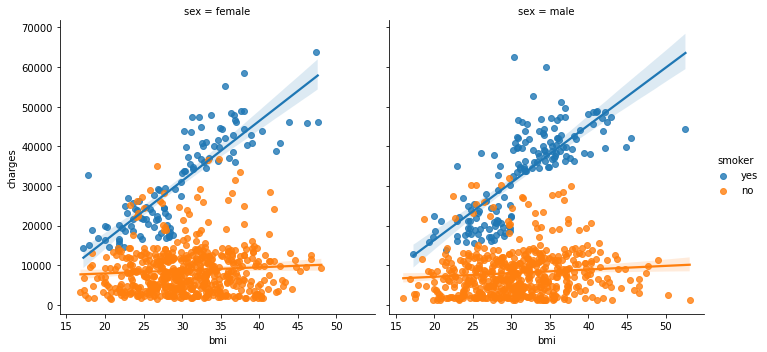

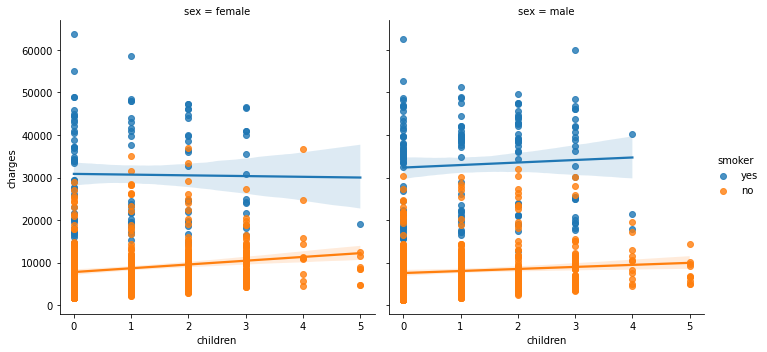

In [ ]:
plt.figure(figsize= (20,20))

sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', col='sex')
sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', col='sex')
sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', col='sex')


**Inference:**

*   Charges increase for smokers and non-smokers with age (smokers have higher charges than non-smokers)
*   Charges remain slighly uniform with increase in bmi for non-smokers
*   Charges increase significantly  with increase in bmi for smokers
*   As seen in the above plots, charges increase significantly for the smokers irrespective of the age, bmi and number of children




In [ ]:
# Description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# **Perform Predictive modeling to predict charges based on different variables**

As seen in the data description above, there are 3 categorical variables (sex, smoker and region). Based on the above plots and inferences, charges are dependent on age, bmi and smoker variables. To understand this using the regression approach, we consider all the variables (categorical variables to be one-hot encoded), and we eliminate the non-contributing variables.

### **Creating dummies for categorical variables**

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit(df['sex'].drop_duplicates())
df['sex']=encoder.transform(df['sex'])
encoder.fit(df['smoker'].drop_duplicates())
df['smoker']=encoder.transform(df['smoker'])
df1=pd.get_dummies(df['region'], prefix='region')
df = pd.concat([df,df1], axis=1)
print(df.head(5))

   age  sex     bmi  children  smoker     region      charges  \
0   19    0  27.900         0       1  southwest  16884.92400   
1   18    1  33.770         1       0  southeast   1725.55230   
2   28    1  33.000         3       0  southeast   4449.46200   
3   33    1  22.705         0       0  northwest  21984.47061   
4   32    1  28.880         0       0  northwest   3866.85520   

   region_northeast  region_northwest  region_southeast  region_southwest  
0                 0                 0                 0                 1  
1                 0                 0                 1                 0  
2                 0                 0                 1                 0  
3                 0                 1                 0                 0  
4                 0                 1                 0                 0  


### **Linear Regression**

In [ ]:
y= df['charges']
X = df.drop(['charges', 'region'], axis=1)
reg = LinearRegression()

# Split into Train and Test sets 80%-20%
train_X, test_X, train_y, test_y = train_test_split(X.values, y.values, test_size=0.20, random_state=1)

# Fit the model
reg.fit(train_X,train_y)

# Predict
pred_y=reg.predict(test_X)

In [ ]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred, X_train, y_train):

    # Regression metrics
    explained_variance = metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error = metrics.mean_absolute_error(y_true, y_pred) 
    mse = metrics.mean_squared_error(y_true, y_pred)
    mse_train = metrics.mean_squared_error(y_train, reg.predict(X_train))
    median_absolute_error = metrics.median_absolute_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE_test: ', round(np.sqrt(mse),4))
    print('RMSE_train: ', round(np.sqrt(mse_train),4))

In [ ]:
# get importance
importance = reg.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 257.49025
Feature: 1, Score: -242.15307
Feature: 2, Score: 321.62189
Feature: 3, Score: 408.06102
Feature: 4, Score: 23786.48605
Feature: 5, Score: 584.37636
Feature: 6, Score: 188.27980
Feature: 7, Score: -453.99952
Feature: 8, Score: -318.65665


**Regression Result Summary**

In [ ]:
regression_results(test_y, pred_y, train_X, train_y)

explained_variance:  0.7624
r2:  0.7623
MAE:  4051.8588
MSE:  35479352.8073
RMSE_test:  5956.4547
RMSE_train:  6065.2911


**Inference:**



*   r2 is 76.23%
*   RMSE is less than the mean value of charges (13270.422265), i.e., the model is better than average
*   RMSE of test < RMSE of train => slightly underfitting



### **Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor as rfr
x = df.drop(['charges', 'region'], axis=1)
y = df.charges
Rfreg = rfr(n_estimators = 100, criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
Rfreg.fit(train_X,train_y)
pred_X_train = Rfreg.predict(train_X)
pred_X_test = Rfreg.predict(test_X)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


**Random Forest Result Summary**

In [ ]:
print('RMSE train data: ', metrics.mean_squared_error(pred_X_train, train_y))
print('RMSE test data: ', metrics.mean_squared_error(pred_X_test, test_y))
print('r2 train data: ', round(metrics.r2_score(pred_X_train, train_y),3))
print('r2 test data: ', round(metrics.r2_score(pred_X_test, test_y),3))

RMSE train data:  3426958.9237085423
RMSE test data:  21686484.652265247
r2 train data:  0.974
r2 test data:  0.84


**Inference:**

*   r2 is 84% on test data
*   RMSE of test > RMSE of train => overfitting



### **XGB Regressor**

In [ ]:
from xgboost import XGBRegressor
from xgboost import plot_importance

y= df['charges']
X = df.drop(['charges', 'region'], axis=1)
train_X, test_X, train_y, test_y = train_test_split(X.values, y.values, test_size=0.20, random_state=2)
train_X = pd.DataFrame(data=train_X, columns=X.columns)
test_X = pd.DataFrame(data=test_X, columns=X.columns)

model_x = XGBRegressor(n_estimators=1000, learning_rate=0.05)

model_x.fit(train_X, train_y, early_stopping_rounds=5,eval_set=[(test_X, test_y)], verbose=False)
pred_y = model_x.predict(test_X)

[20:41:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


**Ccontributing features**

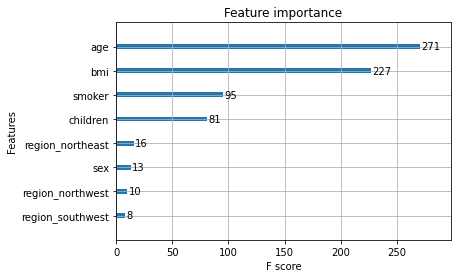

In [ ]:
plot_importance(model_x)

**XGB Regressor Result Summary**

In [ ]:
warnings.filterwarnings("ignore")
regression_results(test_y, pred_y, train_X, train_y)

explained_variance:  0.873
r2:  0.8729
MAE:  2297.9308
MSE:  19088563.7179
RMSE_test:  4369.0461
RMSE_train:  6015.8947


**Inference:**

*   r2 is 87% on test data
*   RMSE of test < RMSE of train => slightly underfitting / similar
*   RMSE is reduced largely using XGB Regressor


**Additional Comments:**
*   Additional analysis can be performed to dig deeper
*   Smoker, bmi and age are significant variables to predict charges
